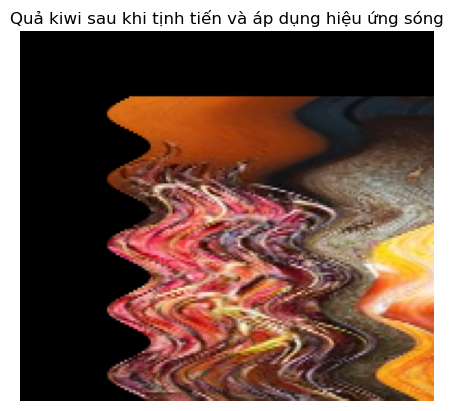

✅ Đã lưu ảnh kết quả tại: exercise/kiwi_wave.jpg


In [3]:
import cv2
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/colorful-ripe-tropical-fruits.jpg')
if img is None:
    print("❌ Không đọc được ảnh.")
    exit()

# --- Bước 1: Cắt vùng chứa quả kiwi (bạn có thể điều chỉnh tọa độ) ---
# Tọa độ tham khảo (kiwi nằm bên phải quả thanh long)
x, y, w, h = 1240, 400, 140, 140
kiwi = img[y:y+h, x:x+w]

# --- Bước 2: Tịnh tiến ảnh kiwi 50 px sang phải, 30 px xuống dưới ---
tx, ty = 50, 30
translated = cv2.warpAffine(kiwi, np.float32([[1, 0, tx], [0, 1, ty]]), (w + tx, h + ty))

# --- Bước 3: Áp dụng hiệu ứng sóng sin ---
def apply_wave_effect(img_section):
    rows, cols = img_section.shape[:2]
    map_y, map_x = np.indices((rows, cols), dtype=np.float32)
    amplitude = 10
    frequency = 2 * np.pi / 30
    map_x += amplitude * np.sin(map_y * frequency)
    distorted = cv2.remap(img_section, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return distorted

wave_img = apply_wave_effect(translated)

# --- Bước 4: Hiển thị ảnh sau khi áp dụng hiệu ứng ---
plt.imshow(cv2.cvtColor(wave_img, cv2.COLOR_BGR2RGB))
plt.title("Quả kiwi sau khi tịnh tiến và áp dụng hiệu ứng sóng")
plt.axis("off")
plt.show()

# --- Bước 5: Lưu kết quả ---
cv2.imwrite('exercise/kiwi_wave.jpg', wave_img)
print("✅ Đã lưu ảnh kết quả tại: exercise/kiwi_wave.jpg")


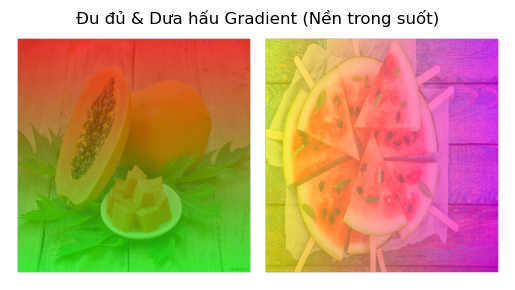

✅ Đã lưu ảnh tại: exercise/du_du_dua_hau_gradient.png


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đường dẫn ảnh
du_du_path = "exercise/DuDu.jpg"
dua_hau_path = "exercise/DuaHau.jpg"

# Kiểm tra tồn tại file
if not os.path.exists(du_du_path):
    print(f"❌ Không tìm thấy ảnh đu đủ tại: {du_du_path}")
    exit()

if not os.path.exists(dua_hau_path):
    print(f"❌ Không tìm thấy ảnh dưa hấu tại: {dua_hau_path}")
    exit()

# Đọc ảnh
img_papaya = cv2.imread(du_du_path)
img_watermelon = cv2.imread(dua_hau_path)

# Resize ảnh nếu cần
img_papaya = cv2.resize(img_papaya, (300, 300))
img_watermelon = cv2.resize(img_watermelon, (300, 300))

# Gradient đỏ → xanh lá cho đu đủ (dọc)
grad_papaya = np.zeros_like(img_papaya)
for y in range(300):
    r = 255 - int(255 * y / 299)
    g = int(255 * y / 299)
    grad_papaya[y, :] = [0, g, r]  # BGR

colored_papaya = cv2.addWeighted(img_papaya, 0.3, grad_papaya, 0.7, 0)

# Gradient vàng → tím cho dưa hấu (ngang)
grad_watermelon = np.zeros_like(img_watermelon)
for x in range(300):
    b = int(255 * x / 299)
    g = 255 - int(255 * x / 299)
    grad_watermelon[:, x] = [b, g, 255]  # BGR

colored_watermelon = cv2.addWeighted(img_watermelon, 0.3, grad_watermelon, 0.7, 0)

# Tạo nền trong suốt (canvas)
canvas = np.zeros((320, 640, 4), dtype=np.uint8)

# Ghép đu đủ bên trái
canvas[10:310, 10:310, :3] = colored_papaya
canvas[10:310, 10:310, 3] = 255  # Alpha đầy đủ

# Ghép dưa hấu bên phải
canvas[10:310, 330:630, :3] = colored_watermelon
canvas[10:310, 330:630, 3] = 255

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGRA2RGBA))
plt.title("Đu đủ & Dưa hấu Gradient (Nền trong suốt)")
plt.axis("off")
plt.show()

# Lưu file PNG có nền trong suốt
save_path = "exercise/du_du_dua_hau_gradient.png"
cv2.imwrite(save_path, canvas)
print(f"✅ Đã lưu ảnh tại: {save_path}")


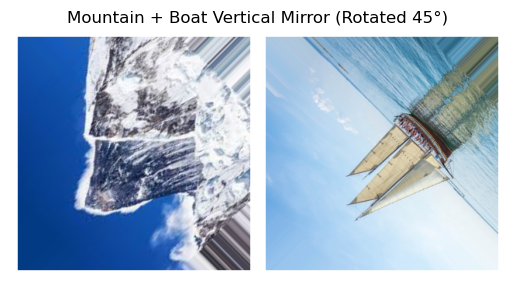

✅ Đã lưu ảnh tại: exercise/mountain_boat_mirror.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import os

# Đường dẫn ảnh gốc
mountain_path = "exercise/mountain.jpg"
boat_path = "exercise/boat.jpg"

# Kiểm tra file tồn tại
if not os.path.exists(mountain_path):
    print(f"❌ Không tìm thấy ảnh núi: {mountain_path}")
    exit()

if not os.path.exists(boat_path):
    print(f"❌ Không tìm thấy ảnh thuyền: {boat_path}")
    exit()

# Đọc ảnh
img_mountain = cv2.imread(mountain_path)
img_boat = cv2.imread(boat_path)

# Resize ảnh về cùng kích thước
img_mountain = cv2.resize(img_mountain, (300, 300))
img_boat = cv2.resize(img_boat, (300, 300))

# Xoay ảnh 45 độ, không thay đổi kích thước (reshape=False)
def rotate_image_keep_size(image, angle):
    return rotate(image, angle=angle, reshape=False, mode='nearest').astype(np.uint8)

mountain_rotated = rotate_image_keep_size(img_mountain, 45)
boat_rotated = rotate_image_keep_size(img_boat, 45)

# Tạo phản chiếu dọc (vertical mirror)
mountain_mirror = cv2.flip(mountain_rotated, 0)
boat_mirror = cv2.flip(boat_rotated, 0)

# Tạo canvas trắng đủ chứa 2 ảnh
canvas_height = 320
canvas_width = 640
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # Trắng

# Ghép ảnh núi (trái) và thuyền (phải) vào canvas
canvas[10:310, 10:310] = mountain_mirror
canvas[10:310, 330:630] = boat_mirror

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.title("Mountain + Boat Vertical Mirror (Rotated 45°)")
plt.axis("off")
plt.show()

# Lưu kết quả
save_path = "exercise/mountain_boat_mirror.jpg"
cv2.imwrite(save_path, canvas)
print(f"✅ Đã lưu ảnh tại: {save_path}")


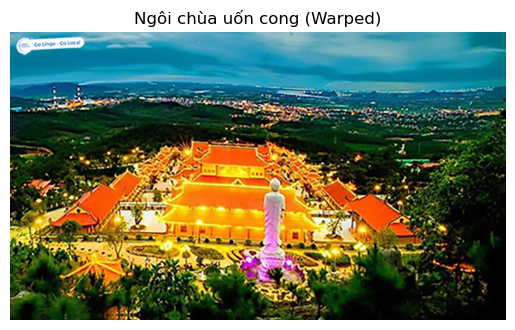

✅ Đã lưu ảnh kết quả tại: exercise/pagoda_warped.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đường dẫn ảnh
pagoda_path = "exercise/pagoda.jpg"

# Kiểm tra ảnh có tồn tại không
if not os.path.exists(pagoda_path):
    print(f"❌ Không tìm thấy ảnh ngôi chùa: {pagoda_path}")
    exit()

# Đọc ảnh
img = cv2.imread(pagoda_path)

# Phóng to 5 lần
zoomed = cv2.resize(img, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)

# Kích thước ảnh
h, w = zoomed.shape[:2]

# Tạo lưới tọa độ x, y
map_y, map_x = np.indices((h, w), dtype=np.float32)

# Tạo hiệu ứng uốn cong: lệch dọc theo sin của trục x
# Bạn có thể thay đổi biên độ (amplitude) và tần số (frequency)
amplitude = 30
frequency = 2 * np.pi / w

# Áp dụng hiệu ứng warping theo trục y
map_y += amplitude * np.sin(map_x * frequency)

# Biến đổi ảnh theo bản đồ mapping đã tạo
warped = cv2.remap(zoomed, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Ngôi chùa uốn cong (Warped)")
plt.axis("off")
plt.show()

# Lưu kết quả
save_path = "exercise/pagoda_warped.jpg"
cv2.imwrite(save_path, warped)
print(f"✅ Đã lưu ảnh kết quả tại: {save_path}")


Chọn ảnh:
1. quang_ninh.jpg
2. boat.jpg
3. DuaHau.jpg

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Biến đổi sóng


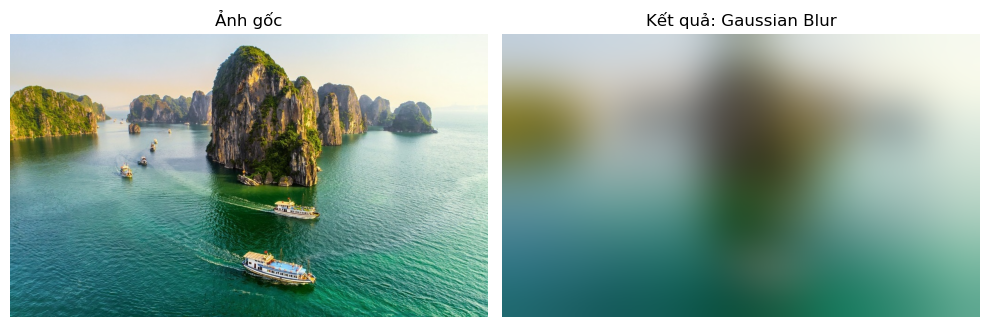

✅ Đã lưu kết quả tại: exercise/results/quang_ninh_blur.jpg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import os

# Danh sách ảnh
image_files = {
    "1": "exercise/quang_ninh.jpg",
    "2": "exercise/boat.jpg",
    "3": "exercise/DuaHau.jpg"
}

# Danh sách phép biến đổi
transform_names = {
    "1": "Tịnh tiến",
    "2": "Xoay",
    "3": "Zoom",
    "4": "Gaussian Blur",
    "5": "Biến đổi sóng"
}

# Tạo thư mục kết quả
os.makedirs("exercise/results", exist_ok=True)

# Hiển thị menu chọn ảnh
print("Chọn ảnh:")
for k, v in image_files.items():
    print(f"{k}. {os.path.basename(v)}")
img_choice = input("Nhập số ảnh bạn muốn chọn (1-3): ").strip()
if img_choice not in image_files or not os.path.exists(image_files[img_choice]):
    print("❌ Ảnh không hợp lệ.")
    exit()
img_path = image_files[img_choice]
img = cv2.imread(img_path)
h, w = img.shape[:2]

# Hiển thị menu chọn phép biến đổi
print("\nChọn phép biến đổi:")
for k, v in transform_names.items():
    print(f"{k}. {v}")
transform_choice = input("Nhập số phép biến đổi (1-5): ").strip()

# Xử lý biến đổi theo lựa chọn
result = None
name = ""
if transform_choice == "1":
    dx = int(input("Nhập số pixel tịnh tiến theo trục X: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục Y: "))
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    result = cv2.warpAffine(img, M, (w, h))
    name = "translate"
elif transform_choice == "2":
    angle = float(input("Nhập góc xoay (độ): "))
    reshape_input = input("Có reshape không? (True/False): ").strip().lower()
    reshape = reshape_input == "true"
    result = rotate(img, angle=angle, reshape=reshape, mode='nearest').astype(np.uint8)
    name = "rotate"
elif transform_choice == "3":
    zoom = float(input("Nhập hệ số zoom (ví dụ 1.5 để phóng to): "))
    result = cv2.resize(img, None, fx=zoom, fy=zoom, interpolation=cv2.INTER_LINEAR)
    result = cv2.resize(result, (w, h))
    name = "zoom"
elif transform_choice == "4":
    sigma = float(input("Nhập giá trị sigma (độ mờ): "))
    ksize = int(6 * sigma + 1)
    if ksize % 2 == 0: ksize += 1
    result = cv2.GaussianBlur(img, (ksize, ksize), sigmaX=sigma, sigmaY=sigma)
    name = "blur"
elif transform_choice == "5":
    amplitude = float(input("Nhập biên độ sóng (ví dụ 20): "))
    map_y, map_x = np.indices((h, w), dtype=np.float32)
    frequency = 2 * np.pi / w
    map_y += amplitude * np.sin(map_x * frequency)
    result = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    name = "warp"
else:
    print("❌ Phép biến đổi không hợp lệ.")
    exit()

# Hiển thị ảnh gốc và kết quả
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title(f"Kết quả: {transform_names[transform_choice]}")
plt.axis("off")
plt.tight_layout()
plt.show()

# Lưu kết quả
filename = os.path.splitext(os.path.basename(img_path))[0]
save_path = f"exercise/results/{filename}_{name}.jpg"
cv2.imwrite(save_path, result)
print(f"✅ Đã lưu kết quả tại: {save_path}")

